 Threshold        TPR        FPR
       inf       0.00       0.00
      0.90       0.20       0.00
      0.80       0.20       0.20
      0.75       0.40       0.20
      0.60       0.40       0.40
      0.55       0.60       0.40
      0.50       0.60       0.60
      0.45       0.80       0.60
      0.40       0.80       0.80
      0.30       1.00       0.80
      0.10       1.00       1.00


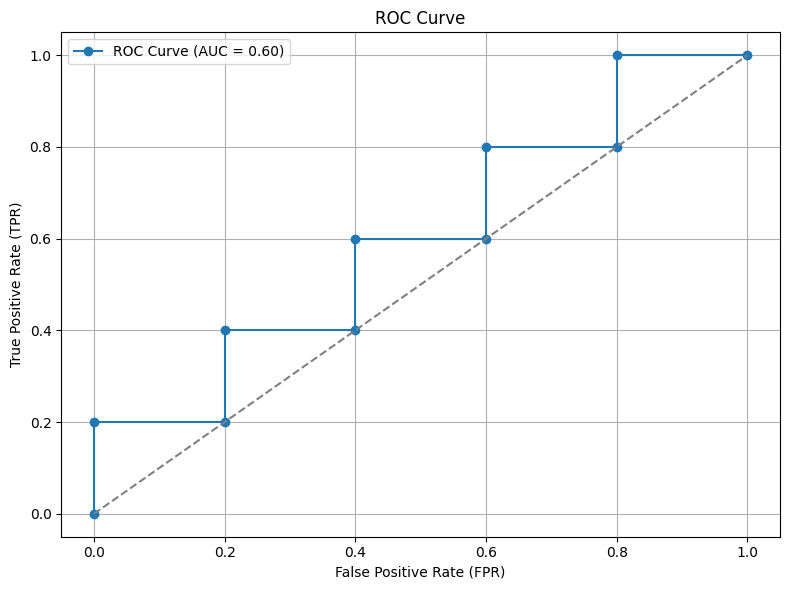

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Given data
true_labels = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
predicted_probs = np.array([0.90, 0.80, 0.75, 0.60, 0.55, 0.50, 0.45, 0.40, 0.30, 0.10])

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)

# Print Threshold, TPR, FPR table
print(f"{'Threshold':>10} {'TPR':>10} {'FPR':>10}")
for i in range(len(thresholds)):
    print(f"{thresholds[i]:10.2f} {tpr[i]:10.2f} {fpr[i]:10.2f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Total Log Loss: 0.6828


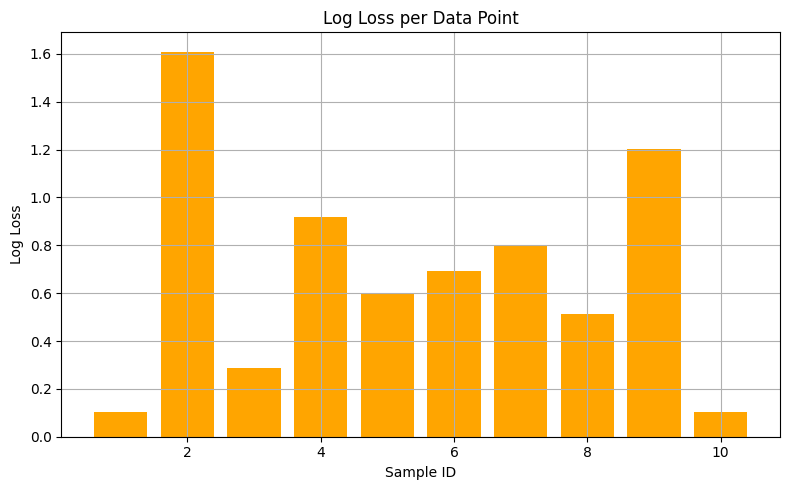

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# True labels and predicted probabilities
true_labels = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
predicted_probs = np.array([0.90, 0.80, 0.75, 0.60, 0.55, 0.50, 0.45, 0.40, 0.30, 0.10])

# Compute log loss per sample
epsilon = 1e-15  # to avoid log(0)
predicted_probs_clipped = np.clip(predicted_probs, epsilon, 1 - epsilon)
log_losses = -(
    true_labels * np.log(predicted_probs_clipped) +
    (1 - true_labels) * np.log(1 - predicted_probs_clipped)
)

# Print average log loss
total_log_loss = log_loss(true_labels, predicted_probs)
print(f"Total Log Loss: {total_log_loss:.4f}")

# Plot log loss per sample
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(log_losses) + 1), log_losses, color='orange')
plt.xlabel('Sample ID')
plt.ylabel('Log Loss')
plt.title('Log Loss per Data Point')
plt.grid(True)
plt.tight_layout()
plt.show()

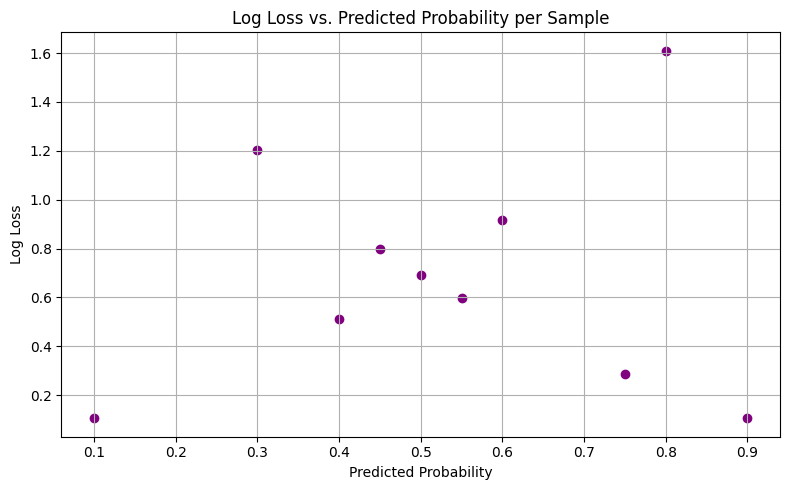

In [3]:
# Plot log loss vs. predicted probability (related to threshold)
plt.figure(figsize=(8, 5))
plt.scatter(predicted_probs, log_losses, color='purple')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Predicted Probability per Sample')
plt.grid(True)
plt.tight_layout()
plt.show()

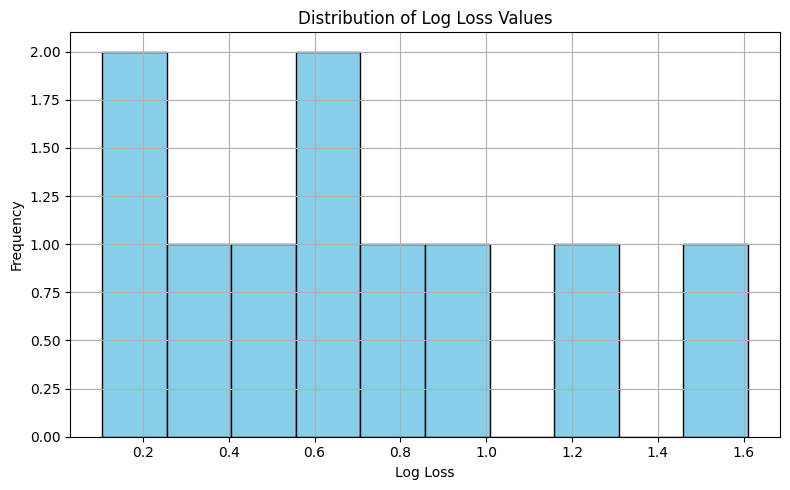

In [5]:
# Plot histogram of Log Loss values
plt.figure(figsize=(8, 5))
plt.hist(log_losses, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Log Loss')
plt.ylabel('Frequency')
plt.title('Distribution of Log Loss Values')
plt.grid(True)
plt.tight_layout()
plt.show()